<a href="https://colab.research.google.com/github/katiegaertner/Digit-Recognizer/blob/main/DeepLearningDigitRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import datetime
from datetime import datetime

In [153]:
#pip install tensorflow

In [154]:
#use GPU
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Load and Prepare MNIST Data

In [155]:
!wget https://github.com/katiegaertner/Digit-Recognizer/archive/refs/heads/main.zip

--2022-02-17 16:57:27--  https://github.com/katiegaertner/Digit-Recognizer/archive/refs/heads/main.zip
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/katiegaertner/Digit-Recognizer/zip/refs/heads/main [following]
--2022-02-17 16:57:27--  https://codeload.github.com/katiegaertner/Digit-Recognizer/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 52.193.111.178
Connecting to codeload.github.com (codeload.github.com)|52.193.111.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip.2’

main.zip.2              [     <=>            ]  15.47M  12.6MB/s    in 1.2s    

2022-02-17 16:57:29 (12.6 MB/s) - ‘main.zip.2’ saved [16227264]



In [156]:
!unzip "/content/main.zip" -d "/content/output_folder/"

Archive:  /content/main.zip
2d365c3113717cf068d5d5943fd611c746ae9921
replace /content/output_folder/Digit-Recognizer-main/DigitRecognizerFinal.ipynb? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/output_folder/Digit-Recognizer-main/DigitRecognizerFinal.ipynb  
replace /content/output_folder/Digit-Recognizer-main/Screen Shot 2022-02-13 at 10.20.27 PM.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/output_folder/Digit-Recognizer-main/Screen Shot 2022-02-13 at 10.20.27 PM.png  
replace /content/output_folder/Digit-Recognizer-main/test.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: /content/output_folder/Digit-Recognizer-main/test.csv.zip  
replace /content/output_folder/Digit-Recognizer-main/train.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: /content/output_folder/Digit-Recognizer-main/train.csv.zip  


In [157]:
!unzip "/content/output_folder/Digit-Recognizer-main/test.csv.zip" -d "/content/output_folder/Digit-Recognizer-main/csvs"

Archive:  /content/output_folder/Digit-Recognizer-main/test.csv.zip
replace /content/output_folder/Digit-Recognizer-main/csvs/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/output_folder/Digit-Recognizer-main/csvs/test.csv  


In [158]:
!unzip "/content/output_folder/Digit-Recognizer-main/train.csv.zip" -d "/content/output_folder/Digit-Recognizer-main/csvs"

Archive:  /content/output_folder/Digit-Recognizer-main/train.csv.zip
replace /content/output_folder/Digit-Recognizer-main/csvs/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/output_folder/Digit-Recognizer-main/csvs/train.csv  


In [171]:
test = pd.read_csv('/content/output_folder/Digit-Recognizer-main/test.csv.zip')
xtest = test

In [172]:
train = pd.read_csv('/content/output_folder/Digit-Recognizer-main/train.csv.zip')
ytrain = train['label']
xtrain = train.drop(['label'], axis=1)

In [182]:
#x_train = xtrain
#y_train = ytrain

#Normalize Data
x_train = xtrain/255
x_test = xtest/255

In [183]:
#from sklearn.model_selection import train_test_split
#x_train, x_validate, y_train, y_validate = train_test_split(xtrain, ytrain, test_size = 0.15)

In [184]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
#print('x_validate shape:', x_validate.shape)
#print(x_validate.shape[0], 'validation samples')
print(x_test.shape[0], 'test samples')

x_train shape: (42000, 784)
42000 train samples
28000 test samples


In [185]:
#reshape x for keras
X_train = x_train.values.reshape(x_train.shape[0], 28, 28, 1)
X_test = x_test.values.reshape(x_test.shape[0], 28, 28, 1)
X_validate = x_validate.values.reshape(x_validate.shape[0], 28, 28, 1)

# Neural Network Model

In [186]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [187]:
#Define the Model
model = keras.models.Sequential([
  Flatten(input_shape=[28, 28]),
  Dense(300, activation="relu"),
  Dense(100, activation="relu"),
  Dense(10, activation="softmax")
])


In [188]:
#Compile the Model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [189]:
#Train the Model
model_1 = model.fit(x=X_train, y=ytrain, validation_split=0.1, batch_size=10, epochs=30)

Epoch 1/30
3780/3780 [==============================] - 8s 2ms/step - loss: 0.4418 - accuracy: 0.8790 - val_loss: 0.2562 - val_accuracy: 0.9271
Epoch 2/30
3780/3780 [==============================] - 8s 2ms/step - loss: 0.2182 - accuracy: 0.9377 - val_loss: 0.1940 - val_accuracy: 0.9424
Epoch 3/30
3780/3780 [==============================] - 8s 2ms/step - loss: 0.1599 - accuracy: 0.9548 - val_loss: 0.1558 - val_accuracy: 0.9521
Epoch 4/30
3780/3780 [==============================] - 8s 2ms/step - loss: 0.1262 - accuracy: 0.9635 - val_loss: 0.1380 - val_accuracy: 0.9605
Epoch 5/30
3780/3780 [==============================] - 8s 2ms/step - loss: 0.1016 - accuracy: 0.9709 - val_loss: 0.1224 - val_accuracy: 0.9624
Epoch 6/30
3780/3780 [==============================] - 8s 2ms/step - loss: 0.0845 - accuracy: 0.9759 - val_loss: 0.1110 - val_accuracy: 0.9664
Epoch 7/30
3780/3780 [==============================] - 8s 2ms/step - loss: 0.0714 - accuracy: 0.9799 - val_loss: 0.1056 - val_accuracy:

# Neural Network Layer and Node experiment

We will conduct an experiment to evaluate the performance of various neural networks by changing the layers and nodes.
Objective: perform a 2x2 crossed design of {3,5} layers and {210,410} nodes

## Neural Network with 3 layers and 210 nodes

In [190]:
experiment = pd.DataFrame(columns = ["Layers", "Nodes", "Time", "Training Accuracy", "Validation Accuracy"])

In [191]:
#3 layers, 210 nodes
layer = 3
node = 210

#start time
start_3_210=datetime.now()

#Define the Model
model_a = keras.models.Sequential([
  Flatten(input_shape=[28, 28]),
  Dense(150, activation="relu"),
  Dense(50, activation="relu"),
  Dense(10, activation="softmax")
])

#Compile the Model
model_a.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

#run the model
model_3_210 = model_a.fit(x=X_train, y=ytrain, validation_split=0.1, batch_size=10, epochs=10)

#end time
end_3_210=datetime.now()
#print total run time
totalrun = end_3_210 - start_3_210

train_acc = model_3_210.history['accuracy'][-1]
valid_acc = model_3_210.history['val_accuracy'][-1]

experiment.loc[len(experiment.index)] = [layer, node, totalrun, train_acc, valid_acc]

Epoch 1/10
3780/3780 [==============================] - 9s 2ms/step - loss: 0.4706 - accuracy: 0.8686 - val_loss: 0.2588 - val_accuracy: 0.9236
Epoch 2/10
3780/3780 [==============================] - 8s 2ms/step - loss: 0.2231 - accuracy: 0.9343 - val_loss: 0.2150 - val_accuracy: 0.9388
Epoch 3/10
3780/3780 [==============================] - 8s 2ms/step - loss: 0.1698 - accuracy: 0.9503 - val_loss: 0.1558 - val_accuracy: 0.9545
Epoch 4/10
3780/3780 [==============================] - 8s 2ms/step - loss: 0.1365 - accuracy: 0.9603 - val_loss: 0.1462 - val_accuracy: 0.9567
Epoch 5/10
3780/3780 [==============================] - 8s 2ms/step - loss: 0.1127 - accuracy: 0.9676 - val_loss: 0.1332 - val_accuracy: 0.9588
Epoch 6/10
3780/3780 [==============================] - 8s 2ms/step - loss: 0.0959 - accuracy: 0.9723 - val_loss: 0.1146 - val_accuracy: 0.9657
Epoch 7/10
3780/3780 [==============================] - 8s 2ms/step - loss: 0.0826 - accuracy: 0.9763 - val_loss: 0.1163 - val_accuracy:

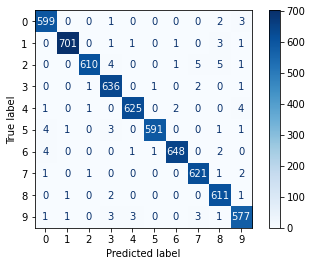

In [192]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#validation prediction:
y_v_predict = model_a.predict(X_validate)
y_v_predict_classes = np.argmax(y_v_predict, axis = 1) 
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

cm = confusion_matrix(y_validate, y_v_predict_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [193]:
#Prediction
Y_pred = model_a.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
#output and format best model predictions for Kaggle

predict_3_210 = pd.DataFrame(Y_pred_classes)
predict_3_210.index.rename('ImageID', inplace=True)
predict_3_210.index += 1
predict_3_210.columns =['Label']

In [194]:
from google.colab import drive
drive.mount('/drive')
predict_3_210.to_csv('/drive/My Drive/GaertnerNN_3_210_MNISTprediction.csv')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


## Neural Network with 3 layers and 410 nodes

In [195]:
#3 layers, 410 nodes
layer = 3
node = 410

#start time
start_3_410=datetime.now()

#Define the Model
model_b = keras.models.Sequential([
  Flatten(input_shape=[28, 28]),
  Dense(300, activation="relu"),
  Dense(100, activation="relu"),
  Dense(10, activation="softmax")
])

#Compile the Model
model_b.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model_3_410 = model_b.fit(x=X_train, y=ytrain, validation_split=0.1, batch_size=10, epochs=10)

#end time
end_3_410=datetime.now()
#print total run time
totalrun = end_3_410 - start_3_410

train_acc = model_3_410.history['accuracy'][-1]
valid_acc = model_3_410.history['val_accuracy'][-1]

experiment.loc[len(experiment.index)] = [layer, node, totalrun, train_acc, valid_acc]

Epoch 1/10
3780/3780 [==============================] - 9s 2ms/step - loss: 0.4364 - accuracy: 0.8801 - val_loss: 0.2510 - val_accuracy: 0.9310
Epoch 2/10
3780/3780 [==============================] - 8s 2ms/step - loss: 0.2140 - accuracy: 0.9377 - val_loss: 0.1929 - val_accuracy: 0.9426
Epoch 3/10
3780/3780 [==============================] - 8s 2ms/step - loss: 0.1596 - accuracy: 0.9543 - val_loss: 0.1578 - val_accuracy: 0.9536
Epoch 4/10
3780/3780 [==============================] - 8s 2ms/step - loss: 0.1255 - accuracy: 0.9634 - val_loss: 0.1387 - val_accuracy: 0.9588
Epoch 5/10
3780/3780 [==============================] - 8s 2ms/step - loss: 0.1022 - accuracy: 0.9710 - val_loss: 0.1237 - val_accuracy: 0.9636
Epoch 6/10
3780/3780 [==============================] - 8s 2ms/step - loss: 0.0859 - accuracy: 0.9758 - val_loss: 0.1174 - val_accuracy: 0.9664
Epoch 7/10
3780/3780 [==============================] - 9s 2ms/step - loss: 0.0722 - accuracy: 0.9798 - val_loss: 0.1107 - val_accuracy:

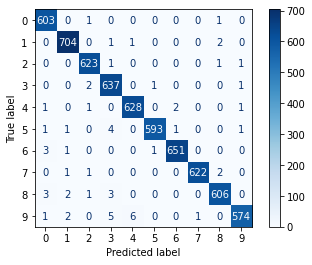

In [196]:
#Confusion Matrix

#validation prediction:
y_v_predict = model_b.predict(X_validate)
y_v_predict_classes = np.argmax(y_v_predict, axis = 1) 
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

cm = confusion_matrix(y_validate, y_v_predict_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [197]:
#Prediction
Y_pred = model_b.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
#output and format best model predictions for Kaggle

predict_3_410 = pd.DataFrame(Y_pred_classes)
predict_3_410.index.rename('ImageID', inplace=True)
predict_3_410.index += 1
predict_3_410.columns =['Label']

In [198]:
predict_3_410.to_csv('/drive/My Drive/GaertnerNN_3_410_MNISTprediction.csv')

## Neural Network with 5 layers and 210 nodes

In [199]:
#5 layers, 210
layer = 5
node = 210

#start time
start_5_210=datetime.now()

#Define the Model
model_c = keras.models.Sequential([
  Flatten(input_shape=[28, 28]),
  Dense(75, activation="relu"),
  Dense(50, activation="relu"),
  Dense(45, activation="relu"),
  Dense(30, activation="relu"),
  Dense(10, activation="softmax")
])

#Compile the Model
model_c.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model_5_210 = model_c.fit(x=X_train, y=ytrain, validation_split=0.1, batch_size=10, epochs=10)

#end time
end_5_210=datetime.now()
#print total run time
totalrun = end_5_210 - start_5_210

train_acc = model_5_210.history['accuracy'][-1]
valid_acc = model_5_210.history['val_accuracy'][-1]

experiment.loc[len(experiment.index)] = [layer, node, totalrun, train_acc, valid_acc]

Epoch 1/10
3780/3780 [==============================] - 9s 2ms/step - loss: 0.5737 - accuracy: 0.8231 - val_loss: 0.2667 - val_accuracy: 0.9231
Epoch 2/10
3780/3780 [==============================] - 9s 2ms/step - loss: 0.2122 - accuracy: 0.9354 - val_loss: 0.1911 - val_accuracy: 0.9395
Epoch 3/10
3780/3780 [==============================] - 9s 2ms/step - loss: 0.1482 - accuracy: 0.9546 - val_loss: 0.1628 - val_accuracy: 0.9507
Epoch 4/10
3780/3780 [==============================] - 9s 2ms/step - loss: 0.1176 - accuracy: 0.9636 - val_loss: 0.1361 - val_accuracy: 0.9581
Epoch 5/10
3780/3780 [==============================] - 9s 2ms/step - loss: 0.0969 - accuracy: 0.9703 - val_loss: 0.1244 - val_accuracy: 0.9598
Epoch 6/10
3780/3780 [==============================] - 9s 2ms/step - loss: 0.0826 - accuracy: 0.9748 - val_loss: 0.1209 - val_accuracy: 0.9624
Epoch 7/10
3780/3780 [==============================] - 9s 2ms/step - loss: 0.0698 - accuracy: 0.9777 - val_loss: 0.1487 - val_accuracy:

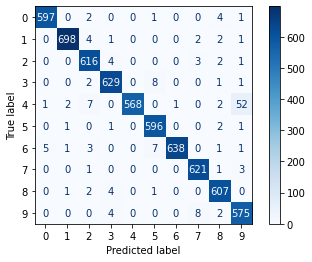

In [200]:
#Confusion Matrix

#validation prediction:
y_v_predict = model_c.predict(X_validate)
y_v_predict_classes = np.argmax(y_v_predict, axis = 1) 
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

cm = confusion_matrix(y_validate, y_v_predict_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [201]:
#Prediction
Y_pred = model_c.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
#output and format best model predictions for Kaggle

predict_5_210 = pd.DataFrame(Y_pred_classes)
predict_5_210.index.rename('ImageID', inplace=True)
predict_5_210.index += 1
predict_5_210.columns =['Label']

In [202]:
predict_5_210.to_csv('/drive/My Drive/GaertnerNN_5_210_MNISTprediction.csv')

## Neural Network with 5 layers and 410 nodes

In [203]:
#5 layers, 410
layer = 5
node = 410

#start time
start_5_410=datetime.now()

#Define the Model
model_d = keras.models.Sequential([
  Flatten(input_shape=[28, 28]),
  Dense(150, activation="relu"),
  Dense(100, activation="relu"),
  Dense(90, activation="relu"),
  Dense(60, activation="relu"),
  Dense(10, activation="softmax")
])

#Compile the Model
model_d.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

#end time
end_5_410=datetime.now()
#print total run time
totalrun = end_5_410 - start_5_410

model_5_410 = model_d.fit(x=X_train, y=ytrain, validation_split=0.1, batch_size=10, epochs=10)

train_acc = model_5_410.history['accuracy'][-1]
valid_acc = model_5_410.history['val_accuracy'][-1]

experiment.loc[len(experiment.index)] = [layer, node, totalrun, train_acc, valid_acc]

Epoch 1/10
3780/3780 [==============================] - 9s 2ms/step - loss: 0.5047 - accuracy: 0.8523 - val_loss: 0.2428 - val_accuracy: 0.9293
Epoch 2/10
3780/3780 [==============================] - 9s 2ms/step - loss: 0.2005 - accuracy: 0.9392 - val_loss: 0.1805 - val_accuracy: 0.9450
Epoch 3/10
3780/3780 [==============================] - 9s 2ms/step - loss: 0.1393 - accuracy: 0.9579 - val_loss: 0.1410 - val_accuracy: 0.9581
Epoch 4/10
3780/3780 [==============================] - 9s 2ms/step - loss: 0.1086 - accuracy: 0.9667 - val_loss: 0.1184 - val_accuracy: 0.9650
Epoch 5/10
3780/3780 [==============================] - 9s 2ms/step - loss: 0.0888 - accuracy: 0.9734 - val_loss: 0.1368 - val_accuracy: 0.9586
Epoch 6/10
3780/3780 [==============================] - 9s 2ms/step - loss: 0.0702 - accuracy: 0.9785 - val_loss: 0.1054 - val_accuracy: 0.9674
Epoch 7/10
3780/3780 [==============================] - 9s 2ms/step - loss: 0.0568 - accuracy: 0.9828 - val_loss: 0.1024 - val_accuracy:

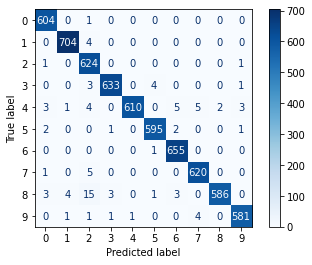

In [204]:
#Confusion Matrix

#validation prediction:
y_v_predict = model_d.predict(X_validate)
y_v_predict_classes = np.argmax(y_v_predict, axis = 1) 
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

cm = confusion_matrix(y_validate, y_v_predict_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [205]:
#Test Prediction
Y_pred = model_d.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis = 1) 

#output and format best model predictions for Kaggle
predict_5_410 = pd.DataFrame(Y_pred_classes)
predict_5_410.index.rename('ImageID', inplace=True)
predict_5_410.index += 1
predict_5_410.columns =['Label']

In [206]:
predict_5_410.to_csv('/drive/My Drive/GaertnerNN_5_410_MNISTprediction.csv')

##Experiment Results

In [207]:
experiment

,Layers,Nodes,Time,Training Accuracy,Validation Accuracy
0,3,210,0 days 00:01:22.486627,0.984497,0.972143
1,3,410,0 days 00:02:22.346501,0.988439,0.970238
2,5,210,0 days 00:01:28.249489,0.985688,0.964524
3,5,410,0 days 00:00:00.048807,0.989974,0.969524
